In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.covariance import MinCovDet

In [2]:
# 데이터 준비
data = np.array([10, 25, 30, 5, 15, 20, 40, 35, 28, 42, 18, 22])
test = np.array([-10, 45, 39, 54, 59])

In [3]:
# 기준점 (중앙값) 설정
reference_point = np.median(data)

# 맨하탄 거리 계산
manhattan_distances = [np.abs(x - reference_point) for x in data]
manhattan_distances_test = [np.abs(x - reference_point) for x in test]

threshold = 19
print(data[[True if x > threshold else False for x in manhattan_distances]])
print(test[[True if x > threshold else False for x in manhattan_distances_test]])

[]
[-10  45  54  59]


In [4]:
# 데이터 준비
data = np.array([(x%10 + x%3) + np.random.randint(1, 10) + np.random.rand() for x in range(200)])
data = data.reshape(-1, 2)
print(data.shape)
test = np.array([[np.random.rand()+ np.random.randint(5, 20), np.random.rand()+np.random.randint(35, 39)] for _ in range(5)]+[[np.random.rand()+ np.random.randint(25, 30), np.random.rand()+np.random.randint(20, 25)] for _ in range(5)])
test

(100, 2)


array([[13.3568054 , 36.16750997],
       [ 7.5552306 , 36.095764  ],
       [ 8.27245998, 35.87638896],
       [ 6.52531017, 35.84819477],
       [18.9253895 , 35.76856388],
       [28.54522678, 23.3152943 ],
       [29.56923524, 24.86700879],
       [27.93428997, 22.23915246],
       [26.51315989, 24.13031849],
       [25.51367196, 24.16964967]])

In [5]:
# Mahalanobis distance 계산
def mahalanobis_distance(X, cov=None, mean=None):
    if cov is None:
        cov = MinCovDet().fit(X).covariance_
        inv_covmat = np.linalg.inv(cov)
        mean = np.mean(X, axis=0)
        m_dist = []
        for row in X:
            diff = row - mean
            m_dist.append(np.sqrt(diff.dot(inv_covmat).dot(diff)))
        return np.array(m_dist), mean, cov
        
    inv_covmat = np.linalg.inv(cov)
    m_dist = []
    for row in X:
        print(row)
        diff = row - mean
        print(np.sqrt(diff.dot(inv_covmat).dot(diff)))
        m_dist.append(np.sqrt(diff.dot(inv_covmat).dot(diff)))
    return np.array(m_dist)

In [6]:
# 임계값 설정
threshold = 5
dist, mean, covariance = mahalanobis_distance(data)

In [7]:
# 이상치를 시각화하는 함수
def plot_outliers(X, threshold, method=mahalanobis_distance, cov=None):
    m_dist, mean, cov = method(X)
    chi_sq = stats.chi2.ppf((1-0.001), df=X.shape[1])  # 자유도가 데이터의 차원 수인 카이 제곱 값

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(m_dist)), m_dist, c='b', label='Mahalanobis Distance')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=chi_sq, color='g', linestyle='--', label='Chi-square threshold')
    plt.title('Mahalanobis Distance vs. Threshold')
    plt.xlabel('Data Point Index')
    plt.ylabel('Mahalanobis Distance')
    plt.legend()
    plt.show()

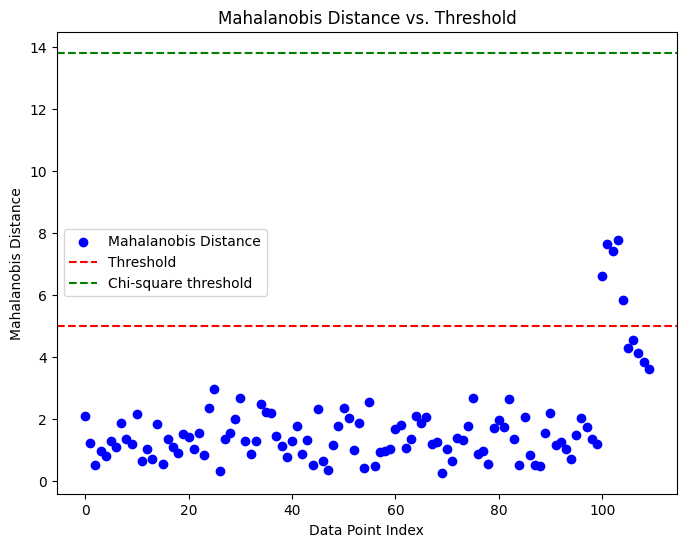

In [9]:
plot_outliers(np.concatenate([data, test]), threshold, cov=covariance) 

In [11]:
data_all = np.concatenate([data, test])
normal = np.array(data_all[[True if x <= threshold else False for x in mahalanobis_distance(data_all, mean=mean, cov=covariance)]])
anomalies = np.array(data_all[[False if x <= threshold else True for x in mahalanobis_distance(data_all, mean=mean, cov=covariance)]])

[ 3.28008561 10.39633296]
2.120329932293184
[8.61511031 8.69558683]
0.818185596207186
[12.26780554 15.53337778]
0.9247254186283306
[13.69927646 17.39488925]
1.3939361464980604
[12.24130343 16.49697453]
1.191903561329706
[7.1367262  8.84475552]
0.9802995268215919
[8.33596171 9.3274084 ]
0.7174663944045726
[9.0998179  6.41644599]
1.4518562961479473
[ 8.50044618 15.58912123]
1.5928789361127604
[15.87415127 17.24975581]
1.5631503270645932
[6.15341112 5.00263701]
1.7682717392513871
[ 9.17536447 11.24145686]
0.389964422410806
[ 7.26565798 10.80495922]
0.9293551386933127
[13.97671494 14.02843603]
0.8920057879466069
[18.60044334 18.55800049]
2.2098011064691288
[ 9.40581511 11.73412149]
0.3637545018056046
[6.02356088 9.84933091]
1.2372230623366516
[ 7.07565814 11.83378398]
1.1186037895666827
[11.7576597  16.65998718]
1.2814650589305945
[17.42450433 16.8441341 ]
1.8332085988105282
[9.38488159 8.07165076]
0.9984398784806998
[8.81118107 9.52568369]
0.6281730983748921
[15.14645363 11.61166948]
1.48

In [12]:
x = np.linspace(-15.0, 45.0, 100)
y = np.linspace(-15.0, 45.0, 100)
X, Y = np.meshgrid(x, y) 
Z = []
for x, y in zip(X, Y):
    Z.append(mahalanobis_distance(np.concatenate([x.reshape(-1, 1),y.reshape(-1, 1)],axis=1), mean=mean, cov=covariance))

[-15. -15.]
7.741963828868734
[-14.39393939 -15.        ]
7.652369143198496
[-13.78787879 -15.        ]
7.566617470350951
[-13.18181818 -15.        ]
7.484840896374689
[-12.57575758 -15.        ]
7.407171079976823
[-11.96969697 -15.        ]
7.333738503289168
[-11.36363636 -15.        ]
7.264671659737017
[-10.75757576 -15.        ]
7.200096185157904
[-10.15151515 -15.        ]
7.140133940609499
[ -9.54545455 -15.        ]
7.084902057667499
[ -8.93939394 -15.        ]
7.034511959348543
[ -8.33333333 -15.        ]
6.989068371984445
[ -7.72727273 -15.        ]
6.948668345295233
[ -7.12121212 -15.        ]
6.913400299427324
[ -6.51515152 -15.        ]
6.883343118711627
[ -5.90909091 -15.        ]
6.858565312241819
[ -5.3030303 -15.       ]
6.839124260988231
[ -4.6969697 -15.       ]
6.825065569997698
[ -4.09090909 -15.        ]
6.8164225422781195
[ -3.48484848 -15.        ]
6.813215788272502
[ -2.87878788 -15.        ]
6.81545298148503
[ -2.27272727 -15.        ]
6.82312876697192
[ -1.6666

In [19]:
X.shape, Y.shape, np.array(Z).shape

((100, 100), (100, 100), (100, 100))

In [32]:
mahalanobis_distance([[1, 2], [2,3]], mean=mean, cov=covariance)

[1, 2]
2.946291193043697
[2, 3]
2.627713076760054


array([2.94629119, 2.62771308])

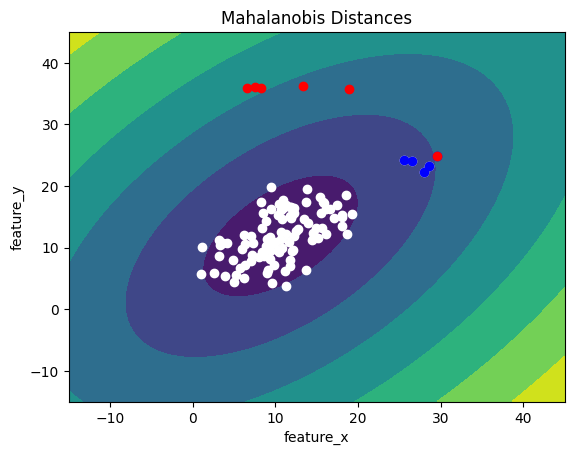

In [13]:

# plots filled contour plot 
fig, ax = plt.subplots(1, 1) 
ax.contourf(X, Y, Z)
ax.scatter(normal[:,0], normal[:, 1], c='white')
ax.scatter(test[5:][:, 0], test[5:][:, 1], c='b')
ax.scatter(anomalies[:,0], anomalies[:, 1], c='red')
  
ax.set_title('Mahalanobis Distances') 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
  
plt.show() 